# Analyzing and Customer Segmentation Results

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 1. Data Loading

Loading customer_segments.csv.

In [17]:
try:
    file_path = "../datasets/processed/customer_segments.csv"
    df_segments = pd.read_csv(file_path)
except FileNotFoundError:
    df_segments = pd.read_csv("customer_segments.csv")

print("Data loaded")
df_segments.head()

Data loaded


,household_id,total_sales,basket_count,avg_basket_size,segment,frequency_segment,overall_segment,recency,total_retail_disc,total_coupon_disc,...,total_coupons_redeemed,discount_ratio,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,cluster
0,1,4330.16,86,50.350698,High,Frequent,High - Frequent,5,697.04,80.56,...,5.0,0.179578,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0
1,2,1954.34,45,43.429778,Avg,Occasional,Avg - Occasional,43,334.99,9.00,...,0.0,0.176013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,3,2653.21,47,56.451277,High,Occasional,High - Occasional,8,675.16,61.19,...,0.0,0.277532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,4,1200.11,30,40.003667,Avg,Rare,Avg - Rare,84,115.65,2.50,...,0.0,0.098449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,5,779.06,40,19.476500,Low,Occasional,Low - Occasional,8,118.33,0.00,...,0.0,0.151888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


## 2. Examining Segment Sizes


C:\Users\fatih\AppData\Local\Temp\ipykernel_19676\3953644291.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")


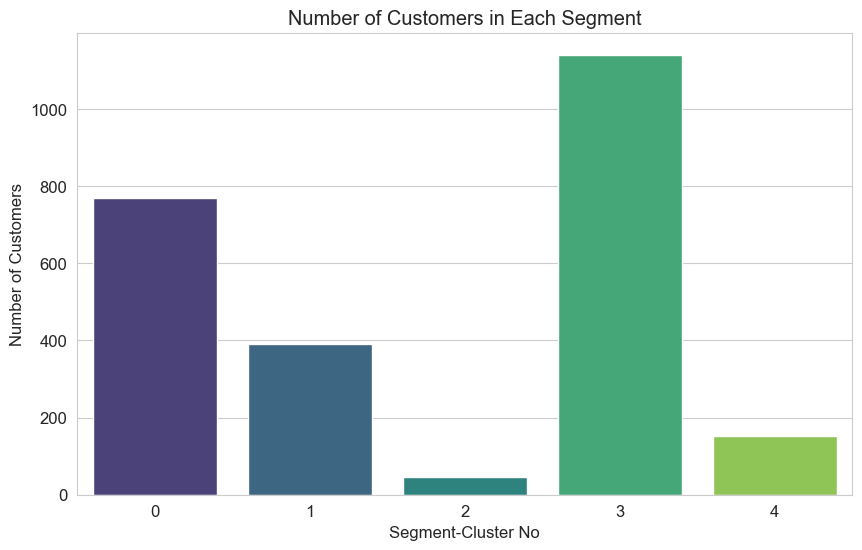

In [18]:
segment_counts = df_segments["cluster"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")
plt.title("Number of Customers in Each Segment")
plt.xlabel("Segment-Cluster No")
plt.ylabel("Number of Customers")
plt.show()

## 3. Detailed Analysis and Visualization of Segment Profiles

### 3.1. RFM (Recency, Frequency, Monetary) Metrics

C:\Users\fatih\AppData\Local\Temp\ipykernel_19676\1396700192.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x="cluster", y=metric, data=df_segments, palette="viridis")
C:\Users\fatih\AppData\Local\Temp\ipykernel_19676\1396700192.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x="cluster", y=metric, data=df_segments, palette="viridis")
C:\Users\fatih\AppData\Local\Temp\ipykernel_19676\1396700192.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x="cluster", y=metric, data=df_segments, palette="vi

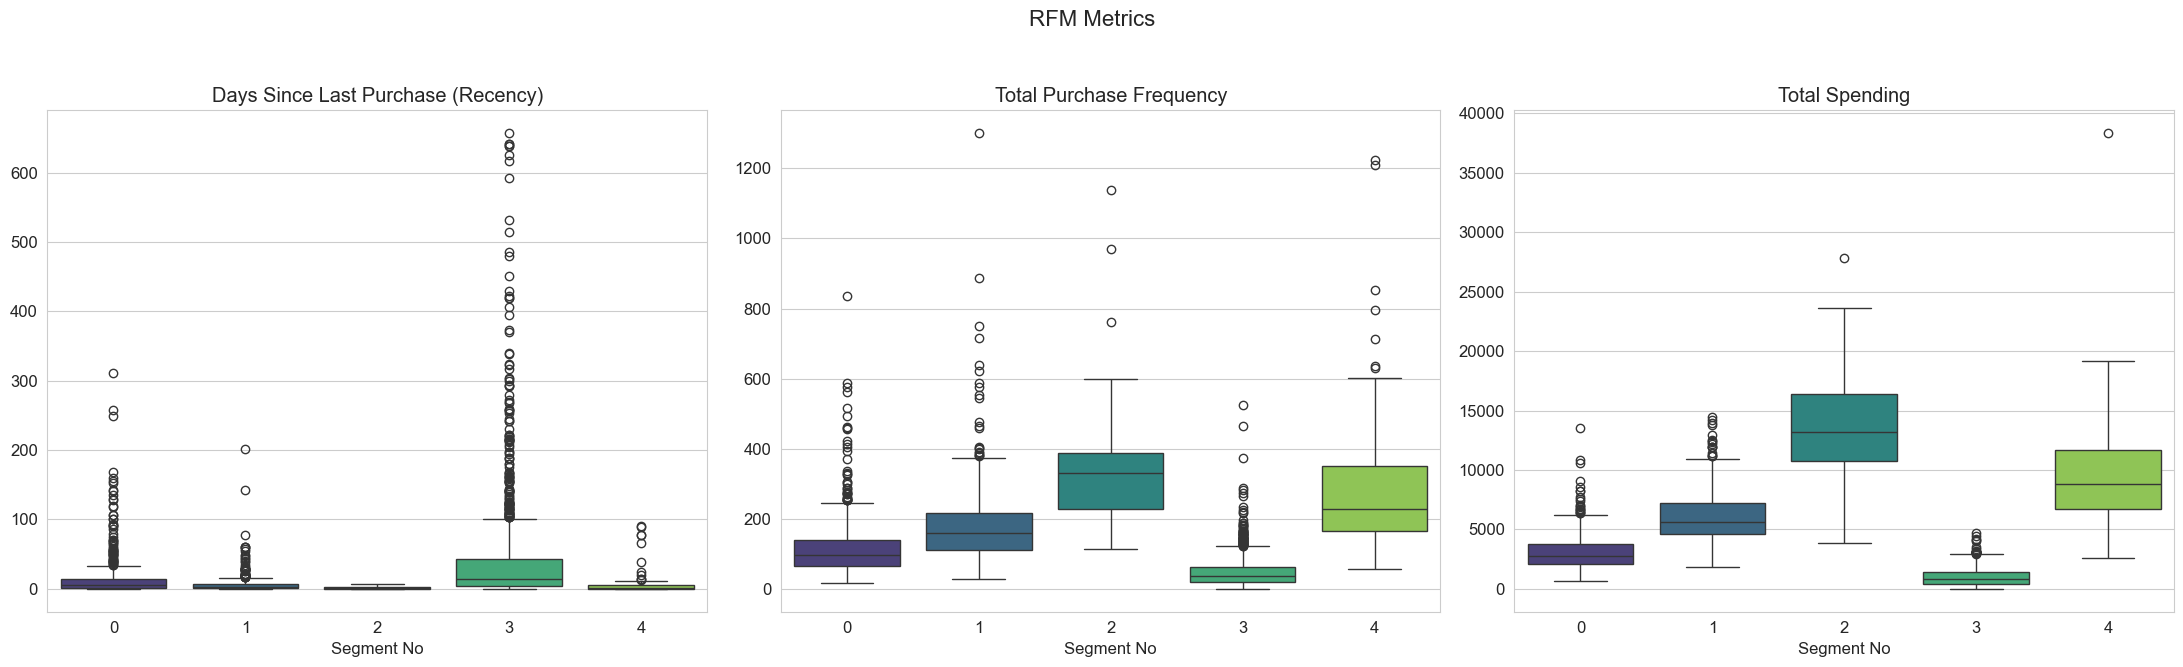

In [19]:
rfm_metrics = ["recency", "basket_count", "total_sales"]
titles = ["Days Since Last Purchase (Recency)", "Total Purchase Frequency", "Total Spending"]

fig, axes = plt.subplots(1, 3, figsize=(22, 7))
fig.suptitle("RFM Metrics", fontsize=16)

for i, metric in enumerate(rfm_metrics):
    sns.boxplot(ax=axes[i], x="cluster", y=metric, data=df_segments, palette="viridis")
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Segment No")
    axes[i].set_ylabel("")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 3.2. Demographic Features

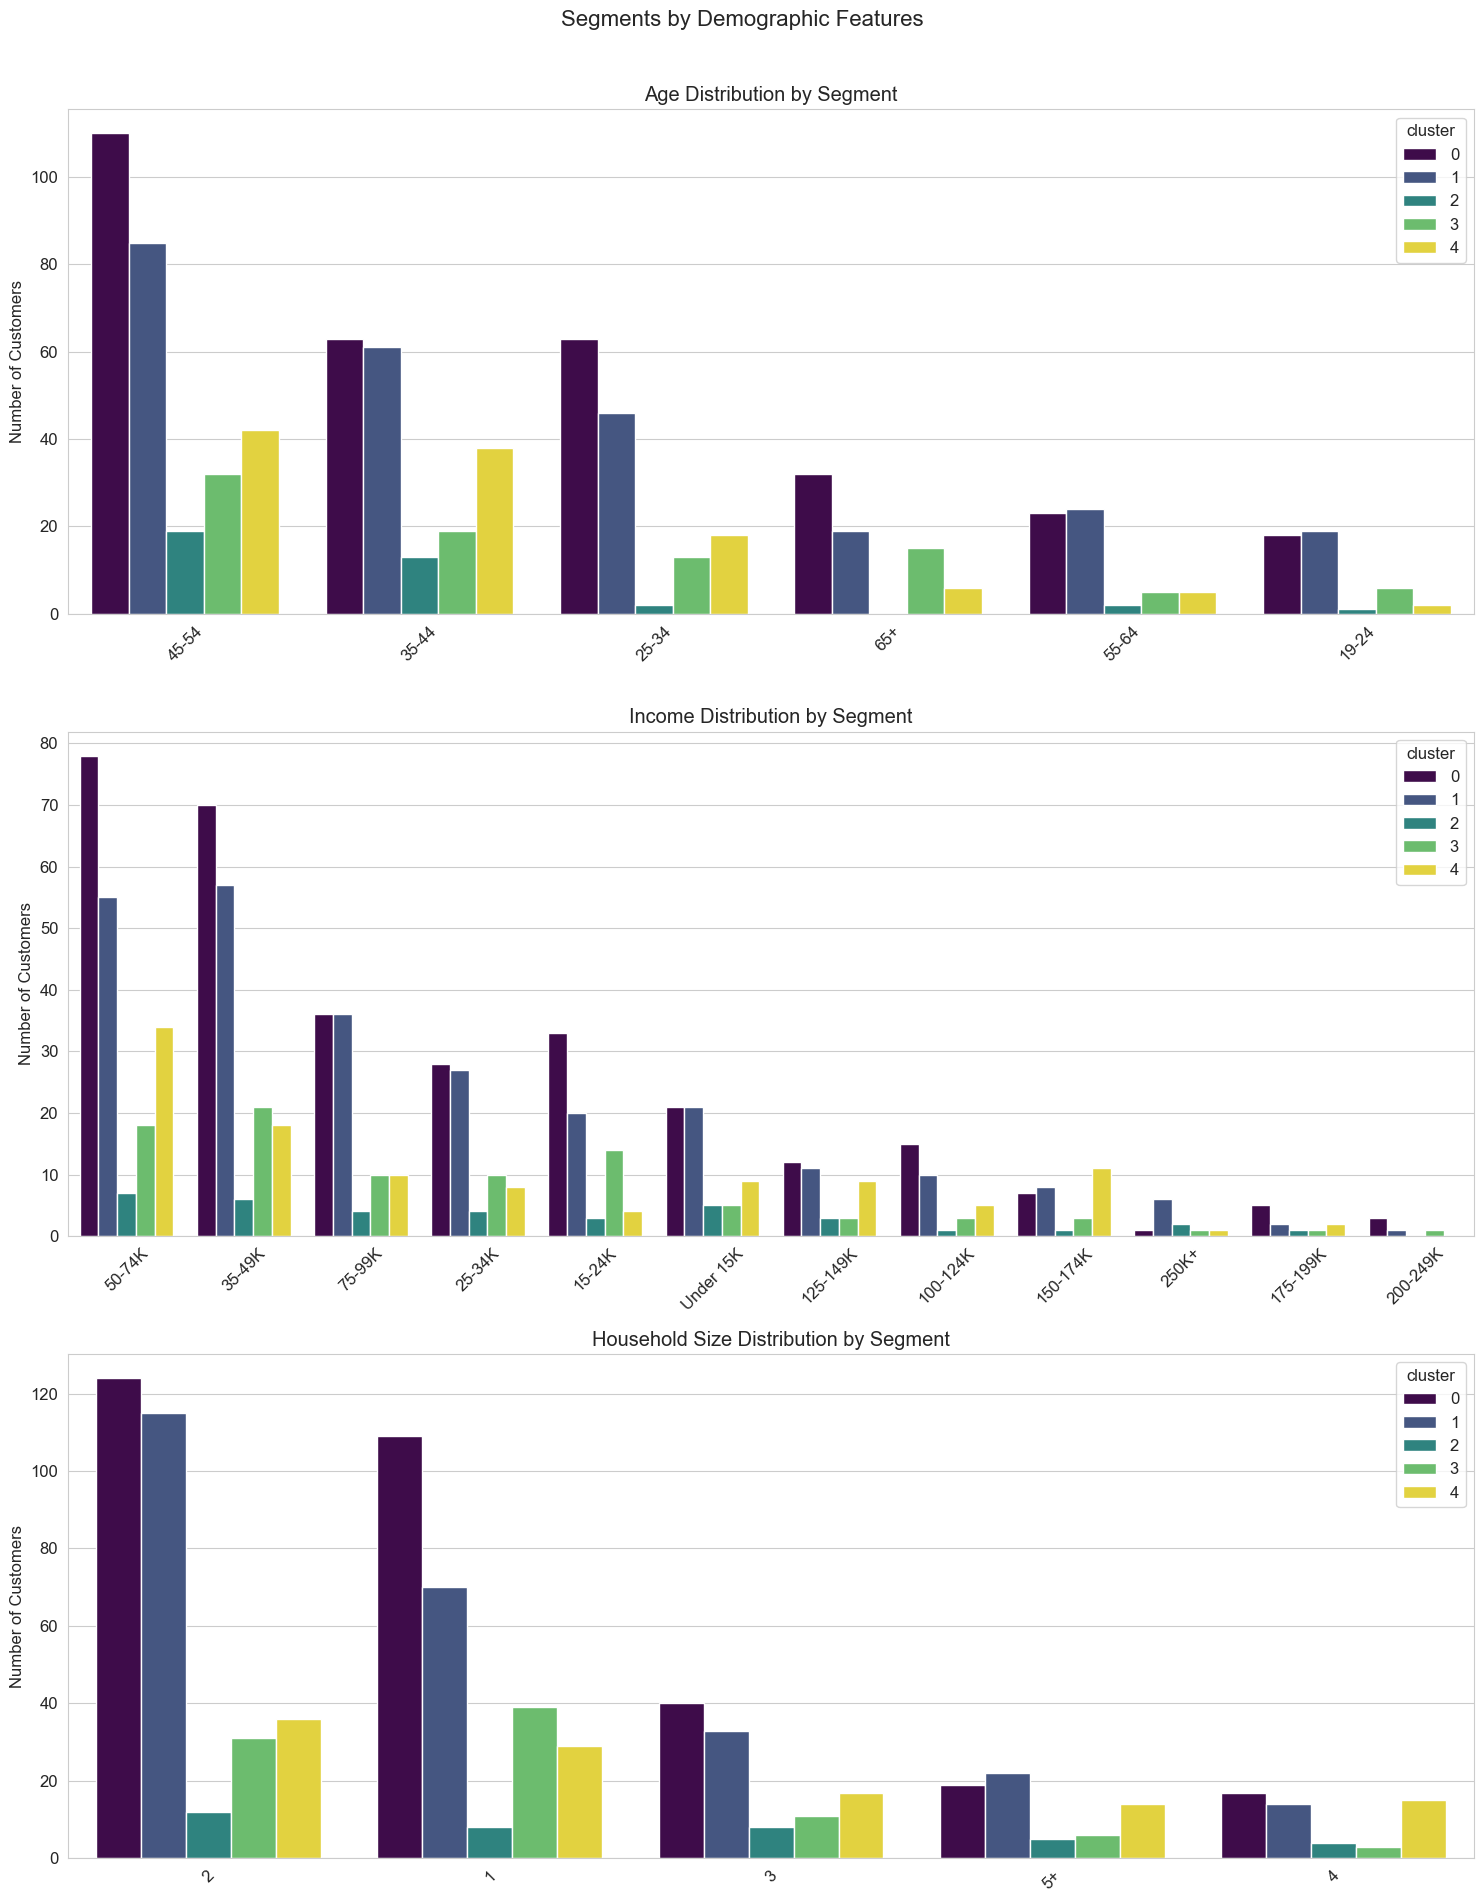

In [20]:
demographic_metrics = ["age_desc", "income_desc", "household_size_desc"]
titles = ["Age Distribution by Segment", "Income Distribution by Segment", "Household Size Distribution by Segment"]

fig, axes = plt.subplots(3, 1, figsize=(15, 20))
fig.suptitle("Segments by Demographic Features", fontsize=16)

for i, metric in enumerate(demographic_metrics):
    sns.countplot(ax=axes[i], x=metric, hue="cluster", data=df_segments, palette="viridis", order=df_segments[metric].value_counts().index)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Number of Customers")
    axes[i].tick_params(axis="x", rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

### 3.3. Promotion and Discount Sensitivity

C:\Users\fatih\AppData\Local\Temp\ipykernel_19676\1320611077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x="cluster", y=metric, data=df_segments, palette="viridis")
C:\Users\fatih\AppData\Local\Temp\ipykernel_19676\1320611077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x="cluster", y=metric, data=df_segments, palette="viridis")


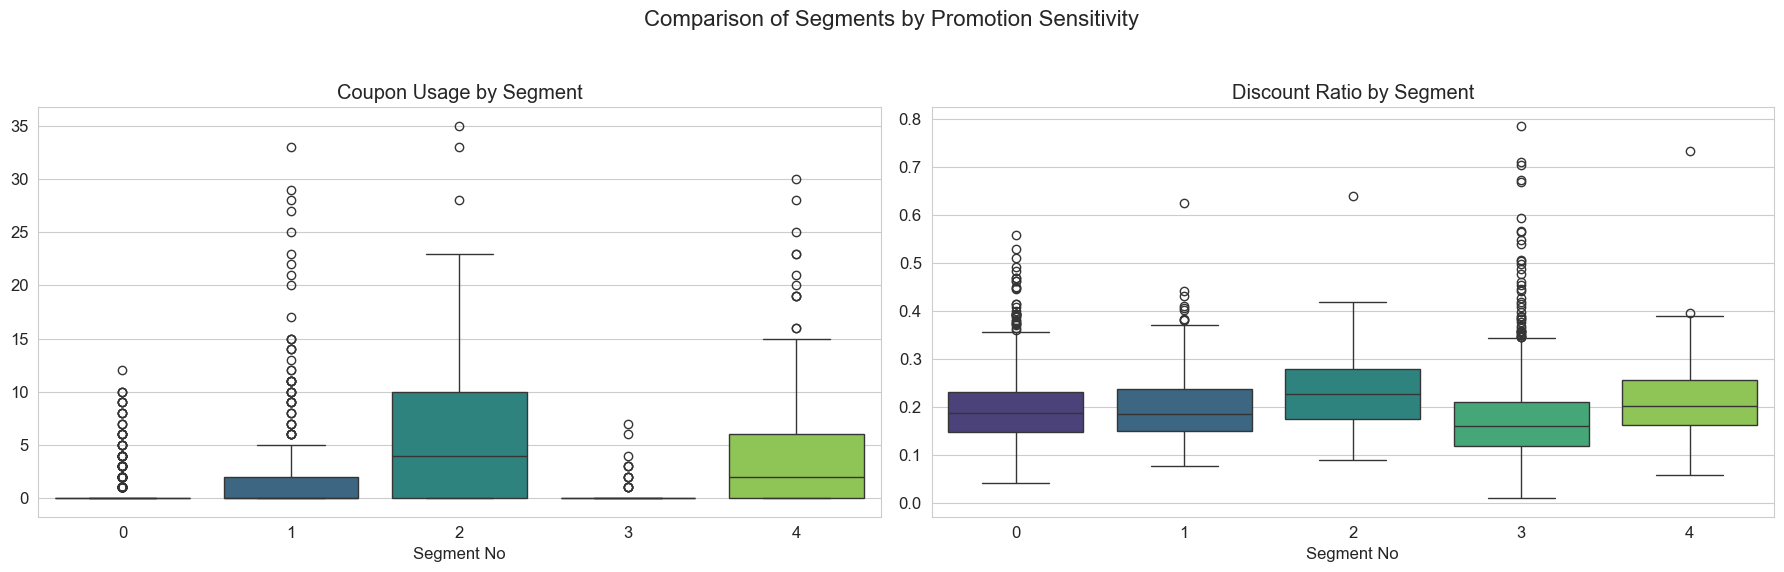

In [21]:
promo_metrics = ["total_coupons_redeemed", "discount_ratio"]
titles = ["Coupon Usage by Segment", "Discount Ratio by Segment"]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle("Comparison of Segments by Promotion Sensitivity", fontsize=16)

for i, metric in enumerate(promo_metrics):
    sns.boxplot(ax=axes[i], x="cluster", y=metric, data=df_segments, palette="viridis")
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Segment No")
    axes[i].set_ylabel("")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 4. Creating and Interpreting the Segment Profile Table

In [22]:
cluster_profile = df_segments.groupby("cluster").agg({
    "total_sales": ["mean", "count"],
    "basket_count": ["mean"],
    "recency": ["mean"],
    "total_coupons_redeemed": ["mean"],
    "discount_ratio": ["mean"],
    "income_desc": lambda x: x.mode()[0] if not x.mode().empty else "N/A",
    "age_desc": lambda x: x.mode()[0] if not x.mode().empty else "N/A"
}).round(2)

print("Profile of Created Customer Segments:")
cluster_profile

Profile of Created Customer Segments:


total_sales       basket_count recency total_coupons_redeemed  \
               mean count         mean    mean                   mean   
cluster                                                                 
0           3115.86   770       115.30   13.06                   0.53   
1           6086.89   390       185.94    7.18                   2.26   
2          13886.82    46       354.00    1.67                   7.22   
3           1022.36  1141        49.29   43.97                   0.03   
4           9666.99   153       278.82    5.46                   4.29   

        discount_ratio income_desc age_desc  
                  mean    <lambda> <lambda>  
cluster                                      
0                 0.20      50-74K    45-54  
1                 0.20      35-49K    45-54  
2                 0.24      50-74K    45-54  
3                 0.18      35-49K    45-54  
4                 0.21      50-74K    45-54